In [99]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [101]:
df = pd.read_csv('/content/drive/MyDrive/sampled_data.csv')

In [102]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-674146,Source2,2,2022-03-17 06:20:28,2022-03-17 07:04:43,39.357891,-77.550835,NaN,NaN,0.000,...,False,False,False,False,False,False,Night,Night,Day,Day
1,A-1390713,Source2,3,2020-07-17 10:46:37,2020-07-17 11:49:02,47.623505,-122.329315,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-4082714,Source1,2,2022-02-16 15:25:31,2022-02-16 16:47:51,35.764024,-80.071614,35.766739,-80.082386,0.632,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-4887571,Source1,2,2022-08-24 15:49:00,2022-08-24 18:04:30,38.484049,-77.393865,38.470352,-77.404721,1.114,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-1189120,Source2,2,2021-01-19 09:44:16,2021-01-19 10:43:27,29.686310,-95.364594,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day


In [103]:
df['Source'].value_counts()

,count
Source,
Source1,216787
Source2,164804
Source3,4828


In [104]:
df.shape

(386419, 46)

In [105]:
df['Severity'].value_counts()

,count
Severity,
2,307849
3,64967
4,10235
1,3368


In the original data the value_counts for the Severity was 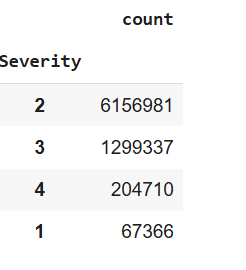

In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386419 entries, 0 to 386418
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     386419 non-null  object 
 1   Source                 386419 non-null  object 
 2   Severity               386419 non-null  int64  
 3   Start_Time             386419 non-null  object 
 4   End_Time               386419 non-null  object 
 5   Start_Lat              386419 non-null  float64
 6   Start_Lng              386419 non-null  float64
 7   End_Lat                216787 non-null  float64
 8   End_Lng                216787 non-null  float64
 9   Distance(mi)           386419 non-null  float64
 10  Description            386419 non-null  object 
 11  Street                 385928 non-null  object 
 12  City                   386397 non-null  object 
 13  County                 386419 non-null  object 
 14  State                  386419 non-nu

In [107]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce')


# **EDA**

<ipython-input-108-d2e98455feb6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='Spectral')


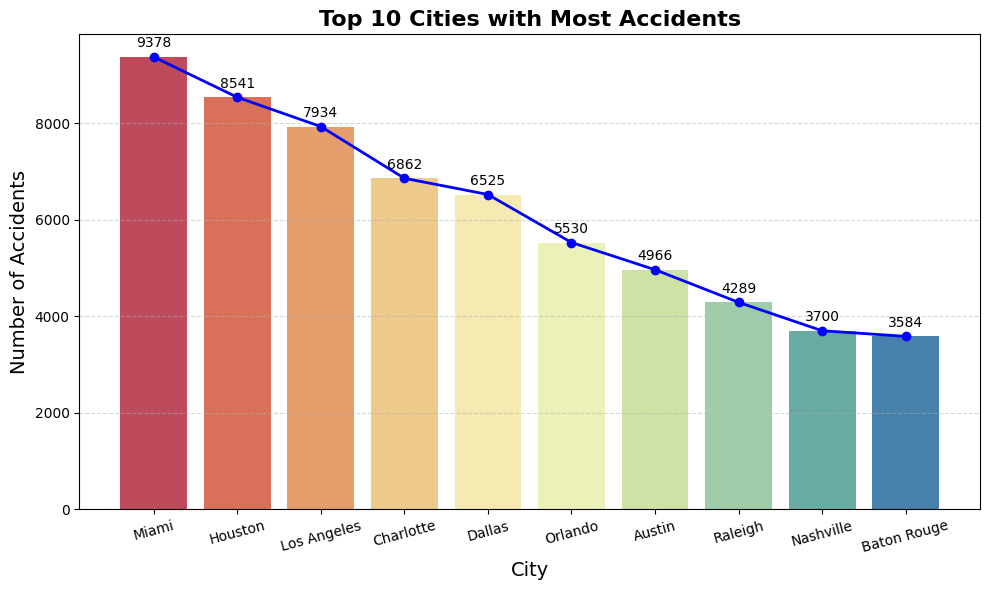

In [108]:
city_accident_counts = df['City'].value_counts()

top_10_cities = city_accident_counts.head(10)

plt.figure(figsize=(10, 6))

sns.barplot(x=top_10_cities.index, y=top_10_cities.values, palette='Spectral')

for i, value in enumerate(top_10_cities.values):
    plt.text(i, value + 200, str(value), ha='center', fontsize=10, color='black')

plt.plot(range(len(top_10_cities.index)), top_10_cities.values, marker='o', color='blue', linestyle='-', linewidth=2)

plt.title('Top 10 Cities with Most Accidents', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()


### Observations


*   Miami leads with significantly higher accidents compared to other cities. This suggests a need for focused attention on traffic safety measures in Miami.
*   
Large metropolitan areas dominate the list: Cities like Houston, Los Angeles, and Dallas, known for high population density and traffic, have a considerable number of accidents.




<ipython-input-109-92d2f64a63ad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_10_streets.index, y= top_10_streets.values, palette='Spectral')


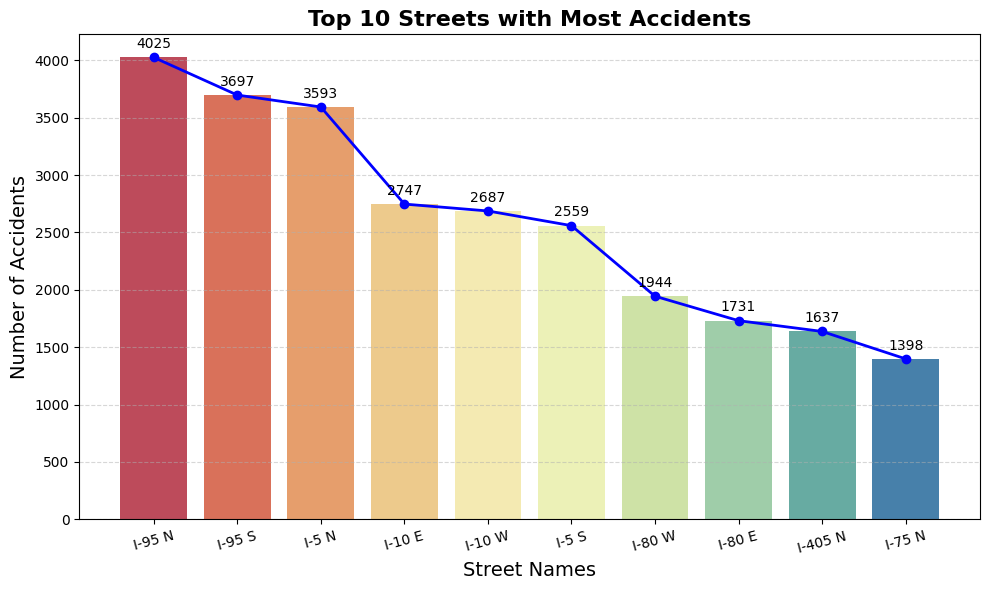

In [109]:
street_accident_counts = df['Street'].value_counts()

top_10_streets = street_accident_counts.head(10)

plt.figure(figsize=(10, 6))

# Create the barplot with vertical bars
sns.barplot(x= top_10_streets.index, y= top_10_streets.values, palette='Spectral')

for i, value in enumerate(top_10_streets.values):
    plt.text(i, value + 80, str(value), ha='center', fontsize=10, color='black')

plt.plot(range(len(top_10_streets.index)), top_10_streets.values, marker='o', color='blue', linestyle='-', linewidth=2)

plt.title('Top 10 Streets with Most Accidents', fontsize=16, fontweight='bold')
plt.xlabel('Street Names', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()

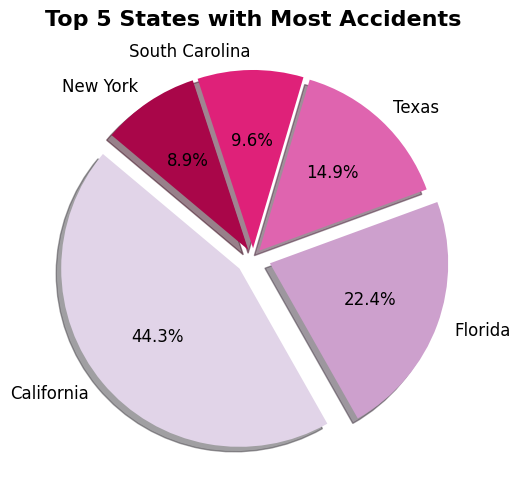

In [110]:
def get_state_name(state_code):
    state_name_mapping = {
        'CA': 'California', 'FL': 'Florida', 'TX': 'Texas', 'SC': 'South Carolina',
        'NY': 'New York', 'NC': 'North Carolina', 'VA': 'Virginia', 'PA': 'Pennsylvania',
        'MN': 'Minnesota', 'OR': 'Oregon', 'AZ': 'Arizona', 'GA': 'Georgia',
        'TN': 'Tennessee', 'IL': 'Illinois', 'MI': 'Michigan', 'LA': 'Louisiana',
        'MD': 'Maryland', 'NJ': 'New Jersey', 'OH': 'Ohio', 'WA': 'Washington',
        'AL': 'Alabama', 'UT': 'Utah', 'CO': 'Colorado', 'OK': 'Oklahoma',
        'MO': 'Missouri', 'CT': 'Connecticut', 'IN': 'Indiana', 'MA': 'Massachusetts',
        'WI': 'Wisconsin', 'KY': 'Kentucky', 'MT': 'Montana', 'NE': 'Nebraska',
        'IA': 'Iowa', 'AR': 'Arkansas', 'KS': 'Kansas', 'NV': 'Nevada',
        'DC': 'District of Columbia', 'RI': 'Rhode Island', 'MS': 'Mississippi',
        'DE': 'Delaware', 'WV': 'West Virginia', 'ID': 'Idaho', 'NH': 'New Hampshire',
        'NM': 'New Mexico', 'WY': 'Wyoming', 'ND': 'North Dakota', 'ME': 'Maine',
        'VT': 'Vermont', 'SD': 'South Dakota'
    }
    return state_name_mapping.get(state_code, state_code)

# Get top 5 states with most accidents and map to their full names
state_accident_counts = df['State'].value_counts()
top_5_states = state_accident_counts.head(5)
top_5_states.index = top_5_states.index.map(get_state_name)

# Define explode values to highlight each slice
explode = [0.1, 0.1, 0.05, 0.05, 0.05]  # Slightly explode all slices for aesthetics

# Define a color palette for the pie chart
colors = sns.color_palette('PuRd', len(top_5_states))


# Plot the pie chart
plt.figure(figsize=(6, 5))
plt.pie(
    top_5_states,
    labels=top_5_states.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    shadow=True,
    textprops={'fontsize': 12}
)

# Add a title
plt.title('Top 5 States with Most Accidents', fontsize=16, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-111-7645866bee4d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette='viridis')


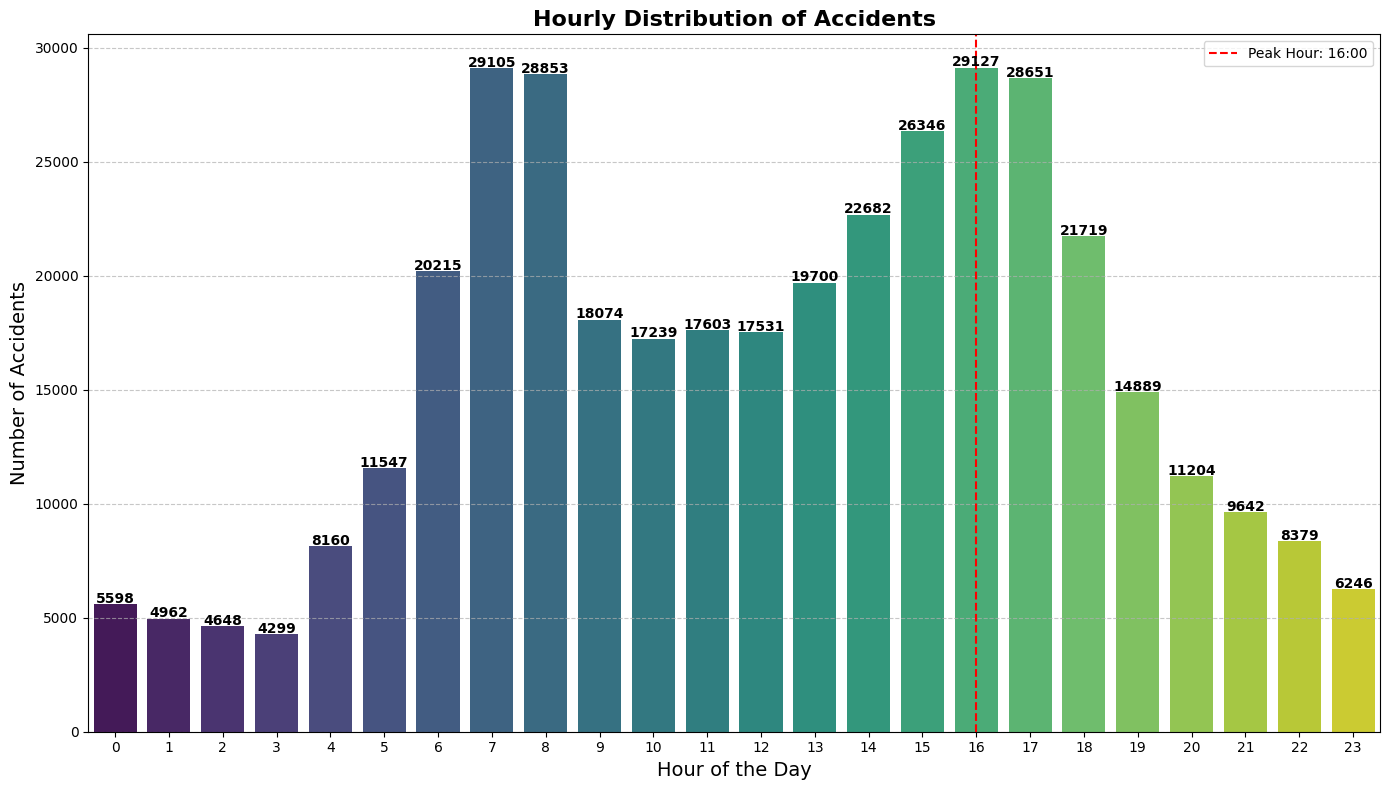

In [111]:
df['Hour'] = df['Start_Time'].dt.hour

# Count the number of accidents for each hour
hourly_accidents = df['Hour'].value_counts().sort_index()

# Find the hour range with the most accidents
most_accidents_hour = hourly_accidents.idxmax()
most_accidents_count = hourly_accidents.max()

 # Plot the hourly distribution of accidents
plt.figure(figsize=(14, 8))
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette='viridis')
# Add annotations (accident counts) on each bar
for i, value in enumerate(hourly_accidents.values):
    plt.text(i, value + 50, str(value), ha='center', fontsize=10, color='black', fontweight='bold')
# Set title and axis labels
plt.title('Hourly Distribution of Accidents', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Accidents', fontsize=14)
# Highlight the peak hour
plt.axvline(x=most_accidents_hour, color='red', linestyle='--', linewidth=1.5, label=f'Peak Hour: {most_accidents_hour}:00')
plt.legend()
# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [112]:


# # US geographical center coordinates
# us_center_lat, us_center_lng = 39.8283, -98.5795

# # Subset data to reduce load on the map (e.g., use the first 10,000 records for demonstration)
# sample_df = df[['Start_Lat', 'Start_Lng']].dropna().head(100000)

# # Create a Folium map centered on the US
# map_us = folium.Map(location=[us_center_lat, us_center_lng], zoom_start=5)

# # Create a marker cluster
# marker_cluster = MarkerCluster().add_to(map_us)

# # Add markers to the cluster
# for lat, lng in zip(df['Start_Lat'], df['Start_Lng']):
#     folium.Marker(location=[lat, lng]).add_to(marker_cluster)

# # Display the map
# map_us.save("us_accidents_map.html")
# map_us


# Feature Selection for Severity Prediction

**1. `ID`**

* **Why drop?** This unique identifier doesn't tell us anything about how severe an accident was.

**2. `Description`**

* **Why drop?** Accident descriptions are text, and making sense of them for our model would take a lot of work. It's simpler to focus on other information.

**3. `Wind_Chill(F)`**

* **Reason:** Wind chill is often closely related to temperature. Since we already have temperature, including wind chill might confuse the model without adding much useful information.

**4. `Zipcode`**

* **Why drop?** Exact zip codes are too specific. Using broader locations like cities or states will be more helpful.

**5. `Country`**

* **Why drop?** All accidents in our dataset are in the US, so this information is the same for every entry.

**6. `Timezone`**

* **Why drop?** We can figure out the time from other information like the `Start_Time`. Timezone itself doesn't directly affect accident severity.

**7. `Airport_Code`**

* **Why drop?** Whether an accident is near an airport probably doesn't have a strong impact on how serious it is.

**8. `Weather_Timestamp`**

* **Why drop?** We already have the weather details (temperature, humidity, visibility, etc.). The exact time the weather was recorded isn't as important.

**9. `Turning_Loop`**

* **Why drop?** Most of the time, this information is the same for all accidents. Features that don't vary much aren't helpful for prediction.

**10. `Nautical_Twilight`, `Civil_Twilight`, `Astronomical_Twilight`**

* **Why drop?** These specific times of twilight are probably not a major factor in how severe an accident turns out to be.

In [113]:
columns_to_drop = [
    'ID', 'Description', 'Street', 'Zipcode', 'Country',
    'Timezone', 'Airport_Code', 'Weather_Timestamp',
    'Turning_Loop', 'Nautical_Twilight', 'Civil_Twilight', 'Astronomical_Twilight'
]

df = df.drop(columns=columns_to_drop)

# Confirm the changes
print(f"Columns dropped: {columns_to_drop}")
print(f"Remaining columns: {df.columns.tolist()}")


Columns dropped: ['ID', 'Description', 'Street', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Turning_Loop', 'Nautical_Twilight', 'Civil_Twilight', 'Astronomical_Twilight']
Remaining columns: ['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'County', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Hour']


In [114]:
df.isnull().sum()

,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,169632
End_Lng,169632
Distance(mi),0
City,22


In [115]:
# Using MODE imputation for categorical columns
categorical_columns = ['City',
                       'Wind_Direction', 'Weather_Condition',
                       'Sunrise_Sunset']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Mean/median imputation for numerical columns
numerical_columns = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)',
                     'Visibility(mi)', 'Wind_Speed(mph)']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)



<ipython-input-115-eb06522ae358>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-115-eb06522ae358>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [116]:
df.columns

Index(['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'City', 'County',
       'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Hour'],
      dtype='object')

In [ ]:
df.isnull().sum()

## **Cleaning Wind_Direction**

*   Calm -> CALM
*   'West', 'WSW', and 'WNW' into 'W'
*   'South', 'SSW', and 'SSE' into 'S'
*   'North', 'NNW', and 'NNE' into 'N'
*   'East', 'ESE', and 'ENE' into 'E'
*   Variable wind ->VAR


In [118]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['CALM' 'NE' 'S' 'E' 'W' 'SE' 'N' 'VAR' 'NW' 'SW']


### **Cleaning Weather_Condition**

In [119]:
df['Weather_Condition'].unique()

array(['Cloudy', 'Fog', 'Partly Cloudy', 'Fair', 'Mostly Cloudy',
       'Light Rain', 'Clear', 'Light Snow', 'Wintry Mix', 'Overcast',
       'T-Storm', 'Light Drizzle', 'Heavy T-Storm', 'Scattered Clouds',
       'Heavy Rain', 'Rain', 'Partly Cloudy / Windy', 'Cloudy / Windy',
       'Light Thunderstorms and Rain', 'Light Freezing Rain', 'Thunder',
       'T-Storm / Windy', 'Wintry Mix / Windy', 'Fair / Windy',
       'Light Rain with Thunder', 'Haze', 'Heavy Snow',
       'N/A Precipitation', 'Drizzle', 'Thunder in the Vicinity', 'Snow',
       'Thunderstorms and Rain', 'Mostly Cloudy / Windy',
       'Heavy Thunderstorms and Rain', 'Heavy Rain / Windy',
       'Showers in the Vicinity', 'Thunder / Windy', 'Smoke',
       'Light Snow / Windy', 'Snow / Windy', 'Mist',
       'Blowing Dust / Windy', 'Thunderstorm', 'Light Rain / Windy',
       'Shallow Fog', 'Rain Showers', 'Heavy Drizzle', 'Patches of Fog',
       'Light Freezing Fog', 'Snow and Sleet', 'Rain / Windy',
       'Haze /

In [120]:
weather_conditions = '!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather_conditions = np.unique(
    np.array(
        re.split("!|\s/\s| and | with |Partly\s|Mostly\s|Blowing\s|Freezing\s", weather_conditions)
    )
).tolist()

In [121]:
# Encode broader weather categories with 0 and 1
df['Clear'] = df['Weather_Condition'].str.contains(r'\bClear\b', case=False, na=False).astype(int)
df['Cloud'] = df['Weather_Condition'].str.contains(r'\bCloud|Overcast\b', case=False, na=False).astype(int)
df['Rain'] = df['Weather_Condition'].str.contains(r'\bRain|Shower|Storm\b', case=False, na=False).astype(int)
df['Heavy_Rain'] = df['Weather_Condition'].str.contains(
    r'\bHeavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms\b', case=False, na=False
).astype(int)
df['Snow'] = df['Weather_Condition'].str.contains(r'\bSnow|Sleet|Ice|Hail\b', case=False, na=False).astype(int)
df['Heavy_Snow'] = df['Weather_Condition'].str.contains(
    r'\bHeavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls\b', case=False, na=False
).astype(int)
df['Fog'] = df['Weather_Condition'].str.contains(r'\bFog|Mist|Haze\b', case=False, na=False).astype(int)
df['Windy'] = df['Weather_Condition'].str.contains(r'\bWindy|Dust|Tornado\b', case=False, na=False).astype(int)
df['Thunderstorm'] = df['Weather_Condition'].str.contains(r'\bT-Storm|Thunder\b', case=False, na=False).astype(int)

# Drop the original 'Weather_Condition' column if desired
df.drop(columns=['Weather_Condition'], inplace=True)


In [122]:
df.shape

(386419, 43)

In [ ]:
df.sample(12)

In [ ]:
df.isnull().sum()

In [125]:
columns_to_drop = [
    'End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'
]

df = df.drop(columns=columns_to_drop)

# Confirm the changes
print(f"Columns dropped: {columns_to_drop}")
print(f"Remaining columns: {df.columns.tolist()}")

Columns dropped: ['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)']
Remaining columns: ['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'City', 'County', 'State', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Hour', 'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog', 'Windy', 'Thunderstorm']


In [126]:
df.shape

(386419, 39)

In [127]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

df['Total_Time'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds()

df.drop(columns=['Start_Time', 'End_Time'], inplace=True)

print(df.head())


    Source  Severity  Start_Lat   Start_Lng  Distance(mi)         City  \
0  Source2         2  39.357891  -77.550835         0.000    Jefferson   
1  Source2         3  47.623505 -122.329315         0.000      Seattle   
2  Source1         2  35.764024  -80.071614         0.632  Thomasville   
3  Source1         2  38.484049  -77.393865         1.114     Stafford   
4  Source2         2  29.686310  -95.364594         0.000      Houston   

      County State  Temperature(F)  Humidity(%)  ...  Clear  Cloud Rain  \
0  Frederick    MD            50.0         94.0  ...      0      1    0   
1       King    WA            59.0         87.0  ...      0      0    0   
2   Davidson    NC            63.0         50.0  ...      0      1    0   
3   Stafford    VA            88.0         39.0  ...      0      0    0   
4     Harris    TX            70.0         61.0  ...      0      1    0   

   Heavy_Rain  Snow  Heavy_Snow  Fog  Windy  Thunderstorm  Total_Time  
0           0     0           0 

In [128]:
negative_count = (df['Total_Time'] < 0).sum()
print(f"Number of rows with negative Total_Time: {negative_count}")



Number of rows with negative Total_Time: 0


In [ ]:
df['County']

In [ ]:
df['County'].value_counts()

In [ ]:
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='County', legend=False, s=20)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_df.corr(method='spearman')

# Display the correlation matrix
# print("Correlation Matrix:")
# print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()


### Observations from the Correlation Matrix:

1. **Low Correlation with Severity**:
   - Most features show very low correlation (close to 0) with the target variable `Severity`. This suggests that none of the numeric columns are strongly predictive of accident severity on their own.

2. **Negative Correlation**:
   - `Start_Lat` has a moderate negative correlation with `Temperature(F)` (-0.44), indicating that colder areas tend to have higher latitudes.
   - `Visibility(mi)` and `Fog` show a noticeable negative correlation (-0.37), which is expected since fog reduces visibility.

3. **Feature Relationships**:
   - `Cloud` and `Rain` are positively correlated (0.28), as cloudiness often leads to rain.
   - `Heavy_Rain` and `Rain` are strongly correlated (0.68), which is logical since heavy rain is a subset of rainy weather.
   - `Windy` has a moderate correlation with `Wind_Speed(mph)` (0.38), as expected.

4. **Highly Correlated Features**:
   - `Clear` and `Cloud` show a strong negative correlation (-0.28), as these are often mutually exclusive.
   - Features like `Rain` and `Heavy_Rain` have high correlation, indicating redundancy or dependency.

5. **Potentially Redundant Features**:
   - `Heavy_Rain` may be redundant with `Rain`.
   - `Fog` overlaps in meaning with `Visibility(mi)` due to their negative correlation (-0.37).

6. **Outliers**:
   - `Total_Time` (if it represents the time span of accidents) does not show significant correlation with other variables, indicating it might be independent.



###  Correlation Insights:
- **Severity Correlations**: Weak correlations across all features, with `Distance(mi)` showing the highest (-0.18).
- **Feature Relationships**: Weather-related features (e.g., `Rain`, `Heavy_Rain`, `Cloud`) and `Distance(mi)` with `Total_Time` (0.41) exhibit moderate inter-correlations.
- **Geographical Impact**: `Start_Lat` negatively correlates with `Temperature(F)` (-0.42), reflecting geographical temperature differences.
- **Visibility vs Fog**: Strong negative correlation (-0.35) suggests redundancy.



### **Encoding Categorical Columns**

In [133]:
num_df = df.select_dtypes(include=[np.number])
categorical_df = df.select_dtypes(exclude=[np.number])


In [134]:
categorical_df.columns


Index(['Source', 'City', 'County', 'State', 'Wind_Direction', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Sunrise_Sunset'],
      dtype='object')

In [135]:
df['Sunrise_Sunset'].value_counts()

,count
Sunrise_Sunset,
Day,267721
Night,118698


#### Encoding Binary Columns

In [136]:
binary_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
               'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal']
df[binary_cols] = df[binary_cols].astype(int)

df['Sunrise_Sunset'] = df['Sunrise_Sunset'].map({'Day': 1, 'Night': 0})

In [137]:
df = pd.get_dummies(df, columns=['Source','Wind_Direction'], drop_first=True)


In [ ]:
df['County'].value_counts()

In [140]:
!pip install category_encoders

In [141]:
df['Severity'].value_counts()

,count
Severity,
2,307849
3,64967
4,10235
1,3368


In [142]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'City', 'County',
       'State', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Hour',
       'Clear', 'Cloud', 'Rain', 'Heavy_Rain', 'Snow', 'Heavy_Snow', 'Fog',
       'Windy', 'Thunderstorm', 'Total_Time', 'Source_Source2',
       'Source_Source3', 'Wind_Direction_E', 'Wind_Direction_N',
       'Wind_Direction_NE', 'Wind_Direction_NW', 'Wind_Direction_S',
       'Wind_Direction_SE', 'Wind_Direction_SW', 'Wind_Direction_VAR',
       'Wind_Direction_W'],
      dtype='object')

In [143]:
# Import libraries
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Split data into features (X) and target (y)
X = df.drop(columns=['Severity'])  # Assuming 'Severity' is the target
y = df['Severity']

y = y - 1

# Check for and handle missing values in City and County (optional)
X['City'] = X['City'].fillna('Unknown')
X['County'] = X['County'].fillna('Unknown')
X['County'] = X['County'].fillna('Unknown')

# Correct train-test split order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Target Encoding for high-cardinality columns
encoder = TargetEncoder(cols=['City', 'County', 'State'])
X_train_encoded = encoder.fit_transform(X_train, y_train)
X_test_encoded = encoder.transform(X_test)

# Ensure all columns are numeric
assert X_train_encoded.select_dtypes(include=['object']).empty, "Non-numeric columns found!"
assert X_test_encoded.select_dtypes(include=['object']).empty, "Non-numeric columns found!"

# Train model with encoded City and County
model_with_encoding = XGBClassifier(random_state=42)
model_with_encoding.fit(X_train_encoded, y_train)
y_pred_with_encoding = model_with_encoding.predict(X_test_encoded)
score_with_city_county = accuracy_score(y_test, y_pred_with_encoding)

# Train model without City and County
X_train_dropped = X_train.drop(columns=['City', 'County', 'State'])
X_test_dropped = X_test.drop(columns=['City', 'County', 'State'])

model_without_encoding = XGBClassifier(random_state=42)
model_without_encoding.fit(X_train_dropped, y_train)
y_pred_without_encoding = model_without_encoding.predict(X_test_dropped)
score_without_city_county = accuracy_score(y_test, y_pred_without_encoding)

# Print results
print("Accuracy with City/County:", score_with_city_county)
print("Accuracy without City/County:", score_without_city_county)


Accuracy with City/County: 0.8665312354433
Accuracy without City/County: 0.8607732519020754


In [144]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
print(X_train_encoded.select_dtypes(include=['object']).columns)



In [ ]:
df.head()